# Rules
* Internet and Books are ALLOWED
* Name your file as following: StudentID_ChineseName/EnglishName_quiz#
* Extension of your file or your file type should be .py

# Principal Component Analysis

Applying PCA for image compressing.

Using PCA that is known for its dimension reduction, we will compress a picture while retaining some of the important image features.



- Hint : Use np.cumsum to calculate the explained variance.
- Hint : Use cv2 to read the picture.

Here we have 2 input images, black white and colored

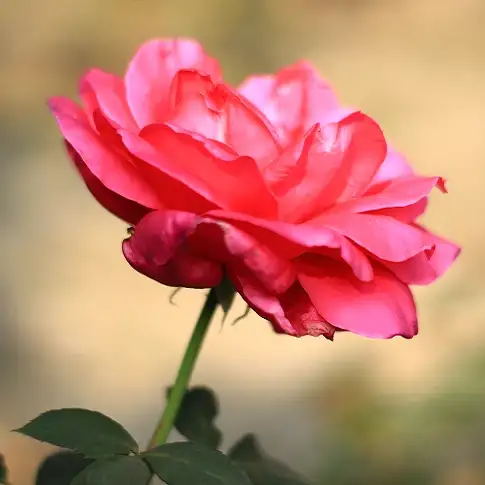 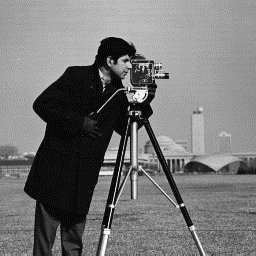

For the question , you need to find the minimum value for PCA components that results in explained variance of **at least** 95%.

## Instruction:

For black and white image
1. Read the image with cv2 functions, your matrix would be in 2 dimensions.
2. Find the minimum PCA components that results in at least 95% explained variance.

For colored image
1. Read the image with cv2 functions, your matrix would be in 3 dimensions (3 channels of RGB).
2. Divide the 3-D matrix in to 3 2-D  matrix for each channel
3. To deal with RGB channel , you need scale the matrix elements into 0 to 1. This can be done by dividing the matrix with 255 **on every channel**.
4. For all the channels, find the minimum PCA components that result in 95% explained variance. Make sure that every channel has the minimum of 95% explained variance. **We only want 1 value of PCA components, not 3!**

**We only want the number of PCA components value. But you can check your reconstructed reduced image of the PCA if you want.**

Hint:

1. To apply PCA, use the module from sklearn.decomposition
2. To find the explained variance, use np.cumsum of the PCA -> np.cumsum(PCA.explained_variance_ratio_)


explained_variance_ratio_ will return percentage of variance explained by each of the selected components. This is why we will have to sum it up.

np.cumsum(PCA.explained_variance_ratio_) will return the percentage of "explained variance" for the PCA components. First element will be 1 component of explained variance, second element would be 2 components of explained variance and so on.

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

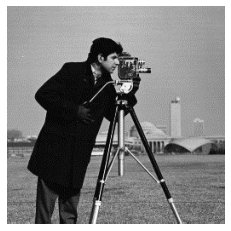

In [54]:
cameraman = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

#change the order BGR to RGB
plt.imshow(cameraman, cmap='gray')
plt.axis('off')
plt.show()

In [55]:
#normalize to 0 ~ 1
cameraman = cameraman / 255

threshold = 0.95
n_component = 50
PCA_cameraman = PCA(n_components=n_component)
PCA_cameraman.fit(cameraman)
cam_ratio = np.cumsum(PCA_cameraman.explained_variance_ratio_)

cam_min_component = 0
for i in range(len(cam_ratio)):
    if cam_ratio[i] >= threshold:
        cam_min_component = i + 1
        break

print('cameraman PCA component: ',cam_min_component)

cameraman PCA component:  39


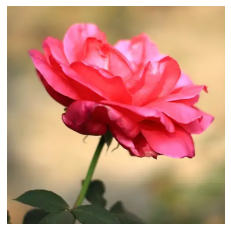

In [56]:
rose = cv2.imread('rose.jpg')

#change the order BGR to RGB
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)
plt.imshow(rose)
plt.axis('off')
plt.show()

In [57]:
#spilt into 3 channel
R, G, B = cv2.split(rose)

#normalize
R = R / 255
G = G / 255
B = B / 255

n_component = 50

PCA_R = PCA(n_components=n_component)
PCA_R.fit(R)

PCA_G = PCA(n_components=n_component)
PCA_G.fit(G)

PCA_B = PCA(n_components=n_component)
PCA_B.fit(B)


#calculate the expleined variance ratio
R_ratio = np.cumsum(PCA_R.explained_variance_ratio_)
G_ratio = np.cumsum(PCA_G.explained_variance_ratio_)
B_ratio = np.cumsum(PCA_B.explained_variance_ratio_)

#determine the min component count to acieve 95%
threshold = 0.95
rose_min_component = 0
for i in range(len(R_ratio)):
    if R_ratio[i] >= threshold and G_ratio[i] >= threshold and B_ratio[i] >= threshold:
        rose_min_component = i + 1
        break

print('rose PCA component: ',rose_min_component)

rose PCA component:  21
